<div class="alert alert-block alert-info">
<b>Notice:</b> This companion notebook showcases the main features that are pre-implemented to make use of pre-trained models.

<br>It illustrates: 
    <li> how to <a href=#load>load</a> pre-trained  GRSSL models,</li> 
    <li> how to get graph's <a href=#representations>representations</a> from the model,</li>
    <li> how to asses models' <a href=#classification>classification capabilities</a>,</li> 
    <li> and how to <a href=#visualise>visualise</a> the generated embeddings. </li>
    
All the steps are compared with representations computed wiht traditional statistical measures on graphs.

In [286]:
import Models.from_pretrained as pretrained

%load_ext autoreload
%autoreload 2

/Users/nmm/miniforge3/envs/env_gdl/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [287]:
PATH_TO_MODEL_GMAE = "./saved/best_models/GraphMAE_GCNversion/"
PATH_TO_MODEL_GMAEvGIN = "./saved/best_models/GraphMAE_GINversion/"

PATH_TO_MODEL_GCC = "./saved/models/GCC_default/0125_141018/"
PATH_TO_MODEL_GCCvGCN = "./saved/models/GCC_default/0207_165045/"

PATH_TO_MODEL_TRAD = "./saved/best_models/trad/"
PATH_TO_MODEL_TRADDEGS = "./saved/best_models/trad_degs/"

PATH_TO_MODEL_NODESEDGES = "./saved/best_models/dummiest/"

PATH_TO_MODEL_GMAEvGCN64 = "./saved/models/GraphMAE_GCNversion/0206_120832/"
PATH_TO_MODEL_GMAEvGCN64bis = "./saved/models/GraphMAE_GCNversion/0206_160014/"

#PATH_TO_PGCL_MODEL = "./saved/models/PGCL_default/0227_102126/"
#PATH_TO_MODEL_PGCL_4_16 = "./saved/best_models/PGCL_layers_4_dim_16/"
PATH_TO_MODEL_PGCL_4_16_pedges = "./saved/best_models/PGCL_layers_4_dim_16_pedges/"#"./saved/models/PGCL_default/0228_181421/"


PATH_TO_MODEL =PATH_TO_MODEL_PGCL_4_16_pedges# PATH_TO_MODEL_TRADDEGS#PATH_TO_MODEL_GCCvGCN#PATH_TO_MODEL_GMAEvGCN64#PATH_TO_MODEL_GMAEvGIN
# contains: 
# - checkpoitnt-epoch{}.pth --> various saved chkpts
# - model_best.pth          --> best model saved
# - config.json             --> config file used to train the model


DATASET_CLASSIFICATION = "REDDIT-BINARY"#"../data/data_gnns/graphs_catalogue.csv"#"REDDIT-BINARY"
DATASET_VISUALISATION = "REDDIT-BINARY"#"../data/data_gnns/graphs_catalogue.csv"#

# 🔌 Loading pre-trained models 

In [3]:
model = pretrained.model_from_checkpoint(path_to_folder=PATH_TO_MODEL_NODESEDGES
                                         #, model_name="checkpoint-epoch10.pth"
                                        )

#for w in model.encoder.layers:
 #   print(w.weight.sum())

KeyError: 'trainer'

In [234]:
pretrained.module_arch.GRSSLModel in model.__class__.__mro__

True

In [235]:
representer = pretrained.represent_from_model(model
                                              #, pooler="avg"
                                             )

In [236]:
representer_gcc = pretrained.representer_from_checkpoint(
    path_to_folder = PATH_TO_MODEL_GCC
)

representer_graphmae = pretrained.representer_from_checkpoint(
    path_to_folder = PATH_TO_MODEL_GMAE,
    representer_args = {'pooler': 'sum'}
)

In [237]:
representer

<function Models.from_pretrained.represent_from_model.<locals>.<lambda>(g)>

# 💡 Graph Representation from loaded models

In [238]:
import dgl
import igraph as ig

er_graph = ig.Graph.Erdos_Renyi(n=100, m=500, directed=False, loops=False)
er_graph = dgl.from_networkx(er_graph.to_networkx())

In [239]:
representer(er_graph)

array([-1.14745550e-01, -5.60876355e-02,  6.45425096e-02, -9.27328801e-05,
        7.24421144e-02, -6.52057454e-02, -1.20349124e-01, -5.53648286e-02,
        1.03299171e-01, -8.07749107e-02, -2.69429591e-02, -6.52214326e-03,
       -2.85704788e-02,  6.01724572e-02, -1.23399563e-01,  2.62644533e-02,
        1.26961060e-02,  4.63539474e-02, -1.22472554e-01,  3.20119672e-02,
        8.84414166e-02,  2.11531013e-01,  1.68208182e-02, -4.35476704e-03,
       -7.61178136e-02,  7.01574236e-02, -3.58952279e-03,  6.52218163e-02,
        4.84684333e-02,  5.26126586e-02,  9.14992392e-02, -5.76862842e-02,
        1.71537787e-01, -1.49564013e-01,  1.03958368e-01,  1.37723354e-03,
       -1.11838013e-01, -1.46557450e-01,  5.27339466e-02,  8.14370513e-02,
        2.16182824e-02, -8.02808180e-02,  1.02939226e-01, -1.29632652e-01,
       -7.40552023e-02, -1.80997998e-02, -8.24660882e-02, -7.38429651e-02,
        1.69256888e-02, -8.62858742e-02, -8.28129519e-03, -7.27774501e-02,
       -1.30327404e-01, -

In [240]:
representer_gcc(er_graph), representer_graphmae(er_graph)

(array([ 0.22556609, -0.09999442,  0.20385738, -0.07194093, -0.25767586,
        -0.2406937 , -0.26762795, -0.07256511, -0.2979454 ,  0.02865836,
        -0.19658858,  0.12960093, -0.23901041,  0.26384553,  0.13440779,
         0.1851467 , -0.05215702,  0.12700249,  0.23645902, -0.03300651,
         0.1455712 ,  0.2667878 , -0.15910502, -0.03322632,  0.08163872,
        -0.23006964, -0.09322838,  0.2623143 ,  0.13245255, -0.08502998,
        -0.00631063, -0.10245603], dtype=float32),
 array([ -5.365834  ,  -3.330631  ,   5.3141756 ,   4.039653  ,
         -3.2716298 ,   1.3505243 ,   5.607729  ,  -6.689242  ,
         -9.897888  ,  -3.33343   , -10.233614  ,  13.409456  ,
          0.40873513, -15.434772  ,   7.7085757 ,   5.2231617 ,
          0.3233106 ,   1.3364315 ,   8.028959  ,   4.0634727 ,
         -2.9754577 ,  -3.6602676 ,  -6.98752   ,  -0.6353791 ,
          0.26548696,   1.6882387 ,  -6.417638  ,   0.682823  ,
          4.3578157 ,   5.493483  ,   6.5872893 , -13.084763  ]

# 🩺 Evaluation of the pre-trained model

In [6]:
import Utils.tasks as tasks

%load_ext autoreload
%autoreload 2

/Users/nmm/miniforge3/envs/env_gdl/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
PATH_TO_MODEL = "saved/best_models/dummiest/"
PATH_TO_MODEL_TRADDEGS = "saved/best_models/trad_degs/"

In [12]:
test_classification = tasks.testmodel_dataset(
    model=PATH_TO_MODEL,#PATH_TO_MODEL,#PATH_TO_MODEL_GCC,
    dataset="MUTAG"
)

NodesEdgesModel(
	[# nodes , # edges]
)
┌-----------------------------------------------------------┐
|                           MUTAG                           |
├-----------------------------------------------------------┤
|number of graphs                       |                188|
|nodes — tot                            |               3371|
|nodes — mean                           | 17.930851063829788|
|nodes — median                         |               17.5|
|nodes — min                            |                 10|
|nodes — max                            |                 28|
|edges — tot                            |               7442|
|edges — mean                           |  39.58510638297872|
|edges — median                         |               38.0|
|edges — min                            |                 20|
|edges — max                            |                 66|
|number of labels                       |                  2|
|   - 0 (0)                   

In [9]:
test_classification.print_scores()

Scores:
	- Micro-F1 = 0.8614
	- Micro-F1 (std.) = 0.0685
	- most_frequent - micro-F1 = 0.6649
	- most_frequent - micro-F1 (std.) = 0.02281
	- uniform - micro-F1 = 0.4737
	- uniform - micro-F1 (std.) = 0.08728


In [4]:
for tu_data in ["REDDIT-BINARY", "COLLAB", "IMDB-BINARY", "IMDB-MULTI", "PROTEINS", "MUTAG"]:
    test_classification = tasks.testmodel_dataset(
        model=PATH_TO_MODEL,#PATH_TO_MODEL,#PATH_TO_MODEL_GCC,
        dataset=tu_data
    )

GraphMAEModel(
  (encoder): GCN(
    (layers): ModuleList(
      (0): GraphConv(
        in=512, out=512, normalization=both
        (_activation): ReLU()
      )
      (1): GraphConv(
        in=512, out=32, normalization=both
        (_activation): Identity()
      )
    )
  )
  (decoder): GRSSLModel(
    (encoder): GCN(
      (layers): ModuleList(
        (0): GraphConv(
          in=32, out=512, normalization=both
          (_activation): ReLU()
        )
        (1): GraphConv(
          in=512, out=512, normalization=both
          (_activation): Identity()
        )
      )
    )
  )
  (encoder_to_decoder): Linear(in_features=32, out_features=32, bias=False)
)
┌-----------------------------------------------------------┐
|                       REDDIT-BINARY                       |
├-----------------------------------------------------------┤
|number of graphs                       |               2000|
|nodes — tot                            |             859254|
|nodes — mean 

In [159]:
for tu_data in ["REDDIT-BINARY", "COLLAB", "IMDB-BINARY", "IMDB-MULTI", "PROTEINS", "DD"]:
    test_classification = tasks.testmodel_dataset(
        model=PATH_TO_MODEL,#PATH_TO_MODEL,#PATH_TO_MODEL_GCC,
        dataset=tu_data
    )

PGCLModel(
  (encoder): PGCLEncoder(
    (convs): ModuleList(
      (0): GINConv(nn=Sequential(
        (0): Linear(in_features=1, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_features=16, bias=True)
      ))
      (1): GINConv(nn=Sequential(
        (0): Linear(in_features=16, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_features=16, bias=True)
      ))
      (2): GINConv(nn=Sequential(
        (0): Linear(in_features=16, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_features=16, bias=True)
      ))
      (3): GINConv(nn=Sequential(
        (0): Linear(in_features=16, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_features=16, bias=True)
      ))
    )
    (bns): ModuleList(
      (0): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, aff

/Users/nmm/Desktop/CMB_CSS_PDM/main_project/DL_module/Models/model_util.py:151: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = torch.tensor(batch, dtype=int)


	... embeddings computed in: 00:00:01.
10-folds SVC-Classification from embeddings ...
	... classification computed in: 00:00:29.
Computing dummy predictions: ['most_frequent', 'uniform'].
Scores:
	- Micro-F1 = 0.9145
	- Micro-F1 (std.) = 0.01635
	- most_frequent - micro-F1 = 0.5
	- most_frequent - micro-F1 (std.) = 0
	- uniform - micro-F1 = 0.4785
	- uniform - micro-F1 (std.) = 0.03443
PGCLModel(
  (encoder): PGCLEncoder(
    (convs): ModuleList(
      (0): GINConv(nn=Sequential(
        (0): Linear(in_features=1, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_features=16, bias=True)
      ))
      (1): GINConv(nn=Sequential(
        (0): Linear(in_features=16, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_features=16, bias=True)
      ))
      (2): GINConv(nn=Sequential(
        (0): Linear(in_features=16, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_features=

/Users/nmm/Desktop/CMB_CSS_PDM/main_project/DL_module/Models/model_util.py:151: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = torch.tensor(batch, dtype=int)


	... embeddings computed in: 00:00:06.
10-folds SVC-Classification from embeddings ...
	... classification computed in: 00:05:23.
Computing dummy predictions: ['most_frequent', 'uniform'].
Scores:
	- Micro-F1 = 0.7478
	- Micro-F1 (std.) = 0.0166
	- most_frequent - micro-F1 = 0.52
	- most_frequent - micro-F1 (std.) = 1.11e-16
	- uniform - micro-F1 = 0.3458
	- uniform - micro-F1 (std.) = 0.02945
PGCLModel(
  (encoder): PGCLEncoder(
    (convs): ModuleList(
      (0): GINConv(nn=Sequential(
        (0): Linear(in_features=1, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_features=16, bias=True)
      ))
      (1): GINConv(nn=Sequential(
        (0): Linear(in_features=16, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_features=16, bias=True)
      ))
      (2): GINConv(nn=Sequential(
        (0): Linear(in_features=16, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_fe

/Users/nmm/Desktop/CMB_CSS_PDM/main_project/DL_module/Models/model_util.py:151: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = torch.tensor(batch, dtype=int)


	... embeddings computed in: 00:00:00.
10-folds SVC-Classification from embeddings ...
	... classification computed in: 00:00:15.
Computing dummy predictions: ['most_frequent', 'uniform'].
Scores:
	- Micro-F1 = 0.715
	- Micro-F1 (std.) = 0.02941
	- most_frequent - micro-F1 = 0.5
	- most_frequent - micro-F1 (std.) = 0
	- uniform - micro-F1 = 0.499
	- uniform - micro-F1 (std.) = 0.04989
PGCLModel(
  (encoder): PGCLEncoder(
    (convs): ModuleList(
      (0): GINConv(nn=Sequential(
        (0): Linear(in_features=1, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_features=16, bias=True)
      ))
      (1): GINConv(nn=Sequential(
        (0): Linear(in_features=16, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_features=16, bias=True)
      ))
      (2): GINConv(nn=Sequential(
        (0): Linear(in_features=16, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_features=16

/Users/nmm/Desktop/CMB_CSS_PDM/main_project/DL_module/Models/model_util.py:151: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = torch.tensor(batch, dtype=int)


	... embeddings computed in: 00:00:01.
10-folds SVC-Classification from embeddings ...
	... classification computed in: 00:00:32.
Computing dummy predictions: ['most_frequent', 'uniform'].
Scores:
	- Micro-F1 = 0.4933
	- Micro-F1 (std.) = 0.01909
	- most_frequent - micro-F1 = 0.3333
	- most_frequent - micro-F1 (std.) = 5.551e-17
	- uniform - micro-F1 = 0.338
	- uniform - micro-F1 (std.) = 0.0411
PGCLModel(
  (encoder): PGCLEncoder(
    (convs): ModuleList(
      (0): GINConv(nn=Sequential(
        (0): Linear(in_features=1, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_features=16, bias=True)
      ))
      (1): GINConv(nn=Sequential(
        (0): Linear(in_features=16, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_features=16, bias=True)
      ))
      (2): GINConv(nn=Sequential(
        (0): Linear(in_features=16, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_

/Users/nmm/Desktop/CMB_CSS_PDM/main_project/DL_module/Models/model_util.py:151: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = torch.tensor(batch, dtype=int)


	... embeddings computed in: 00:00:00.
10-folds SVC-Classification from embeddings ...
	... classification computed in: 00:00:26.
Computing dummy predictions: ['most_frequent', 'uniform'].
Scores:
	- Micro-F1 = 0.7044
	- Micro-F1 (std.) = 0.03402
	- most_frequent - micro-F1 = 0.5957
	- most_frequent - micro-F1 (std.) = 0.001659
	- uniform - micro-F1 = 0.4959
	- uniform - micro-F1 (std.) = 0.04056
PGCLModel(
  (encoder): PGCLEncoder(
    (convs): ModuleList(
      (0): GINConv(nn=Sequential(
        (0): Linear(in_features=1, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_features=16, bias=True)
      ))
      (1): GINConv(nn=Sequential(
        (0): Linear(in_features=16, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_features=16, bias=True)
      ))
      (2): GINConv(nn=Sequential(
        (0): Linear(in_features=16, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out

/Users/nmm/Desktop/CMB_CSS_PDM/main_project/DL_module/Models/model_util.py:151: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = torch.tensor(batch, dtype=int)


	... embeddings computed in: 00:00:01.
10-folds SVC-Classification from embeddings ...
	... classification computed in: 00:00:24.
Computing dummy predictions: ['most_frequent', 'uniform'].
Scores:
	- Micro-F1 = 0.719
	- Micro-F1 (std.) = 0.02399
	- most_frequent - micro-F1 = 0.5866
	- most_frequent - micro-F1 (std.) = 0.002961
	- uniform - micro-F1 = 0.4984
	- uniform - micro-F1 (std.) = 0.04545


In [290]:
for tu_data in ["REDDIT-BINARY", "COLLAB", "IMDB-BINARY", "IMDB-MULTI", "PROTEINS", "DD"]:
    test_classification = tasks.testmodel_dataset(
        model=PATH_TO_MODEL_TRADDEGS,#PATH_TO_MODEL_GCC,
        dataset=tu_data
    )

TradModel(
	 — deg      ( bins : 64   | range: [0, 63] )
)
┌-----------------------------------------------------------┐
|                       REDDIT-BINARY                       |
├-----------------------------------------------------------┤
|number of graphs                       |               2000|
|nodes — tot                            |             859254|
|nodes — mean                           |            429.627|
|nodes — median                         |              304.5|
|nodes — min                            |                  6|
|nodes — max                            |               3782|
|edges — tot                            |            1991016|
|edges — mean                           |            995.508|
|edges — median                         |              758.0|
|edges — min                            |                  8|
|edges — max                            |               8142|
|number of labels                       |                  2|
|   - 0 (0)

In [291]:
test_classification = tasks.testmodel_dataset(
    model=PATH_TO_MODEL_TRADDEGS,#PATH_TO_MODEL_GCC,
    dataset="../data/data_gnns/graphs_catalogue.csv"
)

100%|████████████| 4489/4489 [12:50<00:00,  5.83it/s, graph=yeast_transcription]


TradModel(
	 — deg      ( bins : 64   | range: [0, 63] )
)
┌------------------------------------------------------------┐
|           ../data/data_gnns/graphs_catalogue.csv           |
├------------------------------------------------------------┤
|number of graphs                       |                4478|
|nodes — tot                            |            10841827|
|nodes — mean                           |   2421.131531933899|
|nodes — median                         |               747.5|
|nodes — min                            |                   7|
|nodes — max                            |               69082|
|edges — tot                            |            52679396|
|edges — mean                           |   11764.04555605181|
|edges — median                         |              4155.0|
|edges — min                            |                  28|
|edges — max                            |              198694|
|number of labels                       |                  

In [296]:
deg_res = [91.9, 82.7, 80.8, 73.1, 50.5, 74.9, 75.8]
np.mean(deg_res), np.mean(deg_res[1:])

(75.67142857142856, 72.96666666666667)

In [297]:
graphmae_res = [94.8, 90.0, 79.1, 73.3, 50.5, 74.3, 75.8] # graphmae
np.mean(graphmae_res), np.mean(graphmae_res[1:])

(76.82857142857142, 73.83333333333333)

In [298]:
pgcl_res = [95.1, 91.4, 74.5, 71.3, 48.6, 70.5, 69.8] # pgcl
np.mean(pgcl_res), np.mean(pgcl_res[1:]) # ...

(74.45714285714287, 71.01666666666667)

# 👁 Visulasation of a model's projection on a dataset

In [1]:
import viz as viz

%load_ext autoreload
%autoreload 2

/Users/nmm/miniforge3/envs/env_gdl/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
PATH_TO_MODEL, DATASET_VISUALISATION = './saved/best_models/PGCL_layers_4_dim_16_pedges/', 'REDDIT-BINARY'
PATH_TO_MODEL, DATASET_VISUALISATION

('./saved/best_models/PGCL_layers_4_dim_16_pedges/', 'REDDIT-BINARY')

PGCLModel(
  (encoder): PGCLEncoder(
    (convs): ModuleList(
      (0): GINConv(nn=Sequential(
        (0): Linear(in_features=1, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_features=16, bias=True)
      ))
      (1): GINConv(nn=Sequential(
        (0): Linear(in_features=16, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_features=16, bias=True)
      ))
      (2): GINConv(nn=Sequential(
        (0): Linear(in_features=16, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_features=16, bias=True)
      ))
      (3): GINConv(nn=Sequential(
        (0): Linear(in_features=16, out_features=16, bias=True)
        (1): ReLU()
        (2): Linear(in_features=16, out_features=16, bias=True)
      ))
    )
    (bns): ModuleList(
      (0): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, aff

/Users/nmm/Desktop/CMB_CSS_PDM/main_project/DL_module/Models/model_util.py:151: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = torch.tensor(batch, dtype=int)


	... embeddings computed in: 00:00:02.
📽 Initialising the Graph Representation Visualiser
projecting embeddings with TSNE.


/Users/nmm/miniforge3/envs/env_gdl/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/nmm/miniforge3/envs/env_gdl/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


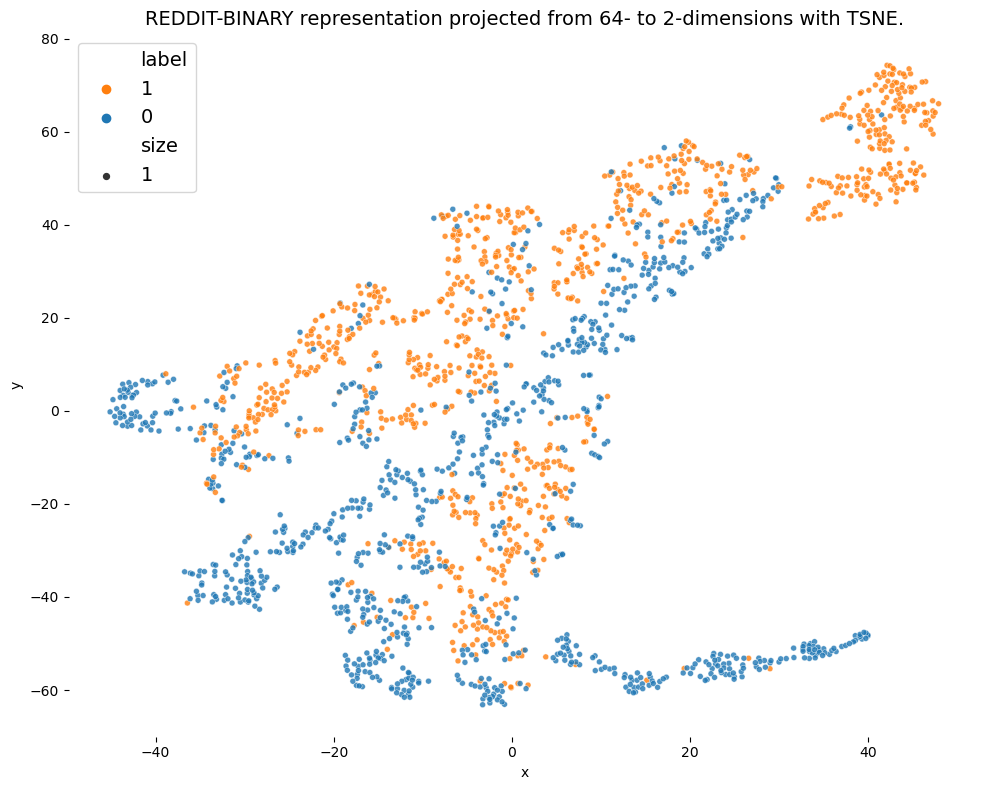

Dash app running on http://0.0.0.0:8060/


In [3]:
viz.main(
    model=PATH_TO_MODEL,
    dataset=DATASET_VISUALISATION,
    model_name=None,
    pooler_args={},
    red_type="manifold.TSNE",#None
    red_args={},
    no_interactive=False,
)

TradModel(
	 — deg      ( bins : 101  | range: [0, 100])
)
┌-----------------------------------------------------------┐
|                       REDDIT-BINARY                       |
├-----------------------------------------------------------┤
|number of graphs                       |               2000|
|nodes — tot                            |             859254|
|nodes — mean                           |            429.627|
|nodes — median                         |              304.5|
|nodes — min                            |                  6|
|nodes — max                            |               3782|
|edges — tot                            |            3982032|
|edges — mean                           |           1991.016|
|edges — median                         |             1516.0|
|edges — min                            |                 16|
|edges — max                            |              16284|
|number of labels                       |                  2|
|   - 0 (0)

/Users/nmm/miniforge3/envs/env_gdl/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/nmm/miniforge3/envs/env_gdl/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


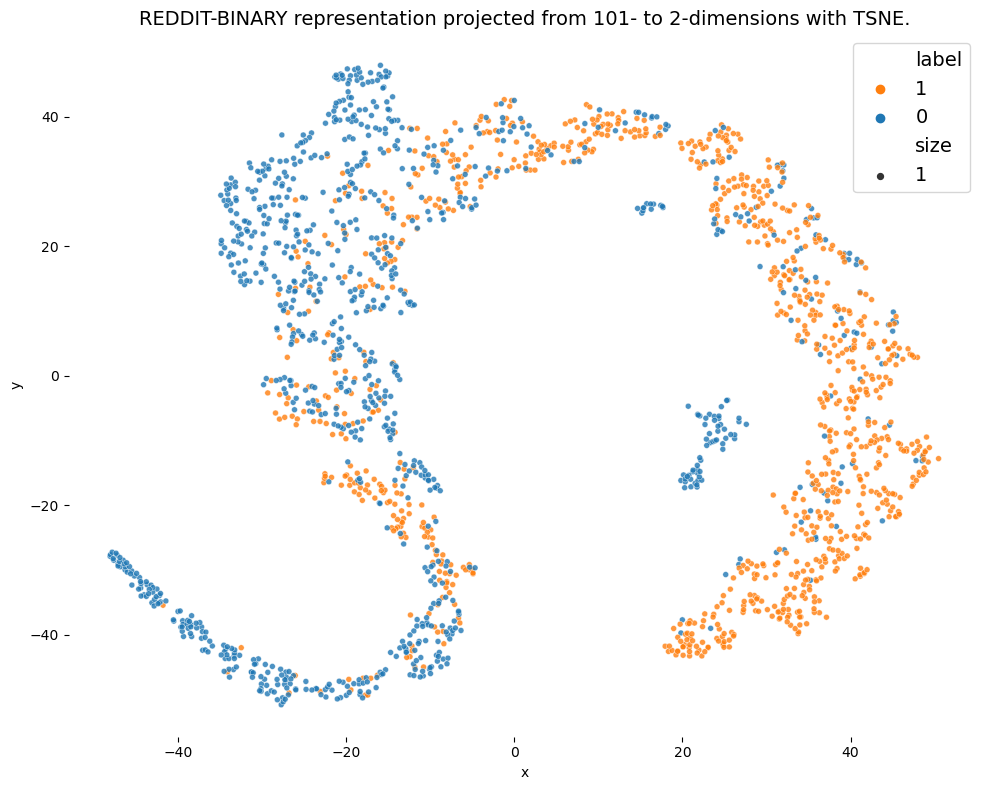

In [115]:
viz.main(
    model=PATH_TO_MODEL_TRADDEGS,
    dataset=DATASET_VISUALISATION,
    model_name=None,
    pooler_args={},
    red_type="manifold.TSNE",#None
    red_args={},
    no_interactive=True,
)

# 🪵 Loss from logs

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
PATH_TO_TRAIN_LOG_GrMAE_GCN = "./saved/best_models/GraphMAE_GCNversion/info.log"
PATH_TO_TRAIN_LOG_GrMAE_GIN = "./saved/log/GraphMAE_default/0127_145712/info.log"
PATH_TO_TRAIN_LOG_GrMAE_GIN64 = "./saved/log/GraphMAE_default/0222_100751/info.log"
PATH_TO_TRAIN_LOG_GrMAE_GCN64 = "./saved/log/GraphMAE_GCNversion/0206_120832/info.log"
PATH_TO_TRAIN_LOG_GrMAE_GCN64bis = "./saved/log/GraphMAE_GCNversion/0206_160014/info.log"

PATH_TO_TRAIN_LOG_GrMAE_REPOR = "saved/repro/log/GraphMAE/{}/info.log"
PATH_TO_TRAIN_LOG_PGCL_REPOR = "saved/repro/log/PGCL/{}/info.log"

#PATH_TO_TRAIN_LOG_GCCvGCN = "./saved/log/GCC_default/0207_142045/info.log"
PATH_TO_TRAIN_LOG_GCCvGCN = "./saved/log/GCC_default/0221_112931/info.log"

#PATH_TO_TRAIN_LOG_PGCL = "./saved/log/PGCL_default/0227_102126/info.log"
#PATH_TO_TRAIN_LOG_PGCL = "./saved/log/PGCL_default/0228_103515/info.log"
PATH_TO_TRAIN_LOG_PGCL = "./saved/log/PGCL_default/0228_181421/info.log"

PATH_TO_TRAIN_LOG = PATH_TO_TRAIN_LOG_GrMAE_REPOR

In [3]:
def get_epochs_key(paths_to_logs:list,
                   key:str = "loss",
                   to_type=None
                  ):
    epochs_vals = []
    key_vals = []
    
    key_ws = key+" "*(15-len(key))+": "

    for file in paths_to_logs:
        with open(file) as f:
            lines = f.readlines()
        f.close()

        epoch_lines = [l for l in lines
                       if "epoch          :" in l]
        key_lines = [l for l in lines
                       if key_ws in l]

        epochs = [int(l.split(":")[-1].split("\n")[0]) for l in epoch_lines]
        
        keys = [l.split(key_ws)[1].split("\n")[0] for l in key_lines]
        if not to_type is None:
            keys = [to_type(k) for k in keys]

        epochs_vals += [epochs]
        key_vals += [keys]
        
    return epochs_vals, key_vals

In [4]:
def plot_loss(epochs
              , loss
              , label=None
              , plot_from:int=1
              , plot_to:int=-1
              , overall_best:bool=False
             ):
    if plot_to == 0:
        epochs, loss = epochs[plot_from:], loss[plot_from:]
    else:
        epochs, loss = epochs[plot_from:plot_to], loss[plot_from:plot_to]
    
    p = plt.plot(epochs, loss
             , lw=2
             #, c='k'
             , label=label
            )
    best_epoch = epochs[np.argmin(loss)]
    best_loss = np.min(loss)
    plt.scatter(best_epoch, best_loss
                , marker="*" if overall_best else "+"
                , color=p[-1].get_color()#"r"
                , s=64
                , label="Best loss: {:.4f}".format(best_loss)
               )
    plt.plot(epochs
             , [best_loss]*len(epochs)
             , ls=":"
             , color=p[-1].get_color()#"r"
            )
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    
def plot_change(
    epochs
    , loss
    , label=None
    , plot_from:int=1
    , plot_to:int=-1
    , alpha=0.4
    , width=0.3
):
    if plot_to == 0:
        epochs, loss = epochs[plot_from:], loss[plot_from:]
    else:
        epochs, loss = epochs[plot_from:plot_to], loss[plot_from:plot_to]
    
    epochs = [e+w/2 for e in epochs[:-1]]
    loss = -np.diff(loss)
    
    plt.bar(epochs, loss
            , alpha=alpha
            , width=width
            , label=label
           )
    
def plot_dist_best(
    epochs
    , loss
    , label=None
    , plot_from:int=1
    , plot_to:int=0
    , alpha=0.4
    , width=0.3
):
    if plot_to == 0:
        epochs, loss = epochs[plot_from:], loss[plot_from:]
    else:
        epochs, loss = epochs[plot_from:plot_to], loss[plot_from:plot_to]
        
    best_loss = np.min(loss)
    
    loss = [l-best_loss for l in loss]
    
    plt.bar(epochs, loss
            , alpha=alpha
            , width=width
            , label=label
           )

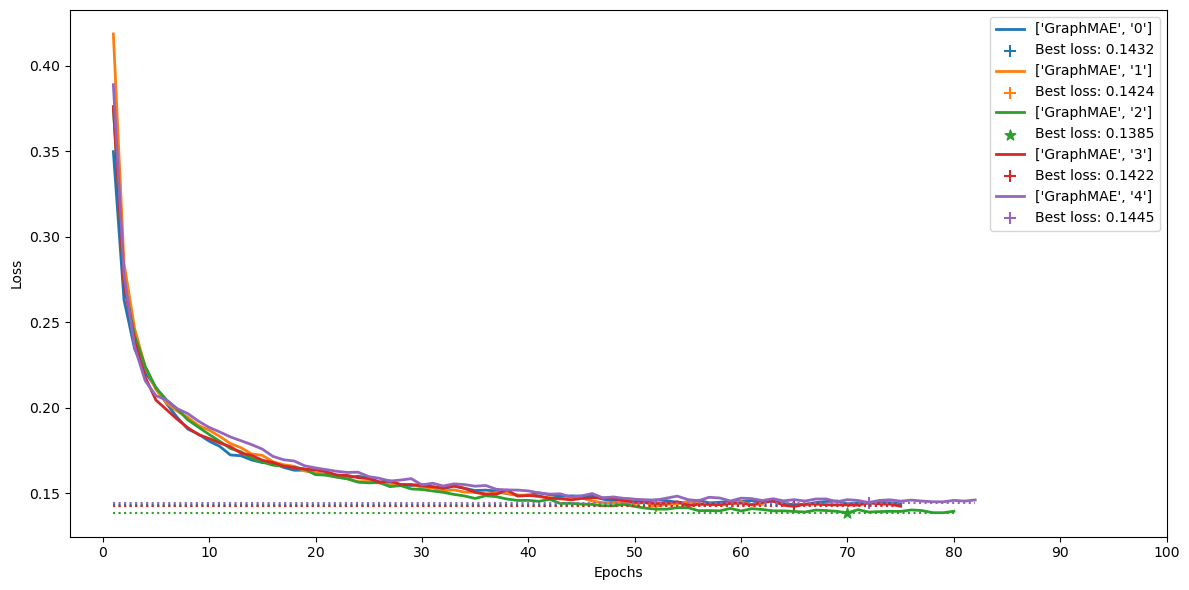

In [12]:
logs_files = [
    #PATH_TO_TRAIN_LOG_GrMAE_GCN,
    #PATH_TO_TRAIN_LOG_GrMAE_GIN,
    #PATH_TO_TRAIN_LOG_GrMAE_GCN64,
    
    #PATH_TO_TRAIN_LOG_GrMAE_GCN64bis,
    #PATH_TO_TRAIN_LOG_GrMAE_GIN,
    #PATH_TO_TRAIN_LOG,
    
    PATH_TO_TRAIN_LOG
]

#main_path = PATH_TO_TRAIN_LOG_PGCL_REPOR#
main_path = PATH_TO_TRAIN_LOG_GrMAE_REPOR
max_i = 5

logs_files = [str(
    main_path.format(i)
)
              for i in range(max_i)
             ]

epochs_vals, loss_vals = get_epochs_key(
    paths_to_logs = logs_files,
    key = "loss",
    to_type=float
)


fig, ax = plt.subplots(figsize=(12,6))
for i, (e, l, f) in enumerate(zip(epochs_vals, loss_vals, logs_files)):
    plot_loss(epochs=e
              , loss=l
              , label=f.split("/")[-3:-1]
              , plot_from=0
              , plot_to=0#len(epochs_vals[1])+1
              , overall_best = (i==np.argmin([np.min(loss) for loss in loss_vals]))
             )
#plt.semilogy()
plt.xticks(np.linspace(0,100,11))
plt.legend()

plt.tight_layout()
plt.savefig("illustrations/loss_plot_graphmae.png")
plt.show()

if False:
    w = (1-0.2)/len(logs_files)

    for i, (e, l, f) in enumerate(zip(epochs_vals, loss_vals, logs_files)):
        plot_dist_best(#plot_change(
            epochs=np.array(e)+i*w
            , loss=l
            , label=f
            , plot_from=1
            , plot_to=len(epochs_vals[-1])+1
            , width=w
        )

    #plt.semilogy()
    plt.legend()
    plt.show()

In [282]:
def get_sec(time_str):
    """Get seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

def zero_digit(d):
    if d<10:
        return '0'+str(int(d))
    else:
        return str(int(d))

def sec_to_hms(seconds):
    h = int(seconds // 3600)
    seconds = seconds%3600
    m = int(seconds//60)
    s = int(seconds%60)
    
    return '{}:{}:{}'.format(
        zero_digit(h),
        zero_digit(m),
        zero_digit(s)
    )

def postop_rm_outliers(values):
    cleaned_values = []
    for vals in values:
        med_v = np.median(vals)
        
        new_vals = [v
                    if v < 2*med_v
                    else int(med_v*2)
                    for v in vals
                   ]
        
        cleaned_values += [new_vals]
        
    return cleaned_values

_, time_vals = get_epochs_key(
    paths_to_logs = logs_files,
    key = "time",
    to_type = get_sec
)

time_vals = postop_rm_outliers(time_vals)

print("Average epochs time:\n\t{}".format(
    [sec_to_hms(np.mean(t)) for t in time_vals]
))
print("Overall average epochs time:\n\t{}".format(
    sec_to_hms(np.mean([e for tt in time_vals for e in tt]))
))
print("Total training time:\n\t{}".format(
    [sec_to_hms(np.sum(t)) for t in time_vals]
))
print("Average training time:\n\t{}".format(
    sec_to_hms(np.mean([np.sum(t) for t in time_vals]))
))

print("Best loss of the models:\n\t{:}".format(
    ["{:.6f}".format(np.min(l)) for l in loss_vals]
))

print("Best epoch of the models:\n\t{}".format(
    [np.argmin(l)+1 for l in loss_vals]
))

best_model_id = np.argmin([np.min(l) for l in loss_vals])
print("Model with lowest lost :\n\t⭐️ {} ({}) — after {} epochs.".format(
    best_model_id,
    np.min(loss_vals[best_model_id]),
    np.argmin(loss_vals[best_model_id])
))

Average epochs time:
	['00:04:32', '00:05:09', '00:05:01', '00:04:46', '00:04:48']
Overall average epochs time:
	00:04:49
Total training time:
	['07:33:45', '03:41:39', '08:21:51', '07:56:45', '07:32:21']
Average training time:
	07:01:16
Best loss of the models:
	['21.347649', '21.563001', '21.118404', '21.306133', '21.328477']
Best epoch of the models:
	[97, 33, 99, 100, 84]
Model with lowest lost :
	⭐️ 2 (21.118404115949357) — after 98 epochs.


In [1]:
import pandas as pd

In [5]:
load_model = "GraphMAE"

loaded_best = pd.read_csv("./saved/repro/models/{}/best_results.csv".format(load_model), header=0, index_col=0)
loaded_untrained = pd.read_csv("./saved/repro/models/{}/untrained_results.csv".format(load_model), header=0, index_col=0)

loaded_best.mean(axis=1)*100, loaded_best.std(axis=1)*100

(REDDIT-BINARY                             90.040000
 COLLAB                                    79.108000
 IMDB-BINARY                               73.260000
 IMDB-MULTI                                50.480000
 PROTEINS                                  74.335586
 DD                                        75.805447
 ../data/data_gnns/graphs_catalogue.csv    94.818872
 MUTAG                                     89.660819
 dtype: float64,
 REDDIT-BINARY                             0.435029
 COLLAB                                    0.360444
 IMDB-BINARY                               0.937017
 IMDB-MULTI                                0.360247
 PROTEINS                                  0.710877
 DD                                        0.322608
 ../data/data_gnns/graphs_catalogue.csv    0.228349
 MUTAG                                     0.496904
 dtype: float64)

In [285]:
print(" | ".join(["{mean:.1f} (&plusmn;{std:.1f}) <br> ↓ <br> {change:.1f}%".format(
    mean = m
    , std=s
    , change = c
) 
                  for m, s, c
                  in zip(loaded_untrained.mean(axis=1)*100
                         , loaded_untrained.std(axis=1)*100
                         , (loaded_untrained.mean(axis=1)-loaded_best.mean(axis=1))/(loaded_best.mean(axis=1))*100
                        )
                 ]))

89.5 (&plusmn;1.3) <br> ↓ <br> -2.1% | 69.8 (&plusmn;0.3) <br> ↓ <br> -6.3% | 71.1 (&plusmn;0.4) <br> ↓ <br> -0.3% | 48.1 (&plusmn;0.3) <br> ↓ <br> -1.0% | 69.7 (&plusmn;0.5) <br> ↓ <br> -1.1% | 66.1 (&plusmn;0.8) <br> ↓ <br> -5.3% | 95.0 (&plusmn;0.7) <br> ↓ <br> -0.1%


In [261]:
(loaded_untrained.mean(axis=1)-loaded_best.mean(axis=1))/(loaded_best.mean(axis=1))*100

REDDIT-BINARY   -2.110905
COLLAB          -6.318445
IMDB-BINARY     -0.280426
IMDB-MULTI      -0.960483
PROTEINS        -1.123901
DD              -5.257453
dtype: float64

35 73


[]

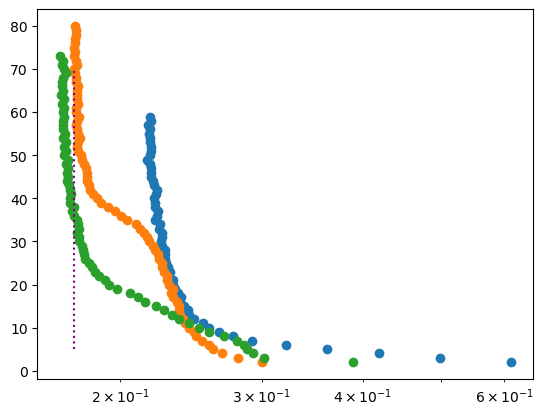

In [90]:
for e, l in zip(epochs_vals, loss_vals):
    plt.scatter(l[1:], e[1:])
    
best_loss_gin = np.min(loss_vals[1])
curr_level = np.argmax(np.array(loss_vals[-1]<best_loss_gin))
print(curr_level, e[-1])

plt.plot([best_loss_gin, best_loss_gin], [5, 70], c="purple", ls=":")
    
plt.semilogx()

# 🧮 Traditional Embedding method

In [89]:
from Models.model_grssl import TradModel

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
import torch
import dgl

src_ids = torch.tensor([2, 3, 4])
# Destination nodes for edges (2, 1), (3, 2), (4, 3)
dst_ids = torch.tensor([1, 2, 3])

test_g = dgl.graph((src_ids, dst_ids))

test_g

Graph(num_nodes=5, num_edges=3,
      ndata_schemes={}
      edata_schemes={})

In [95]:
import numpy as np
from sklearn.decomposition import PCA

In [96]:
trad_mod = TradModel(
    #dimensionality_reducer = PCA(6)
)

['deg', 'dist', 'pr', 'triad']


In [99]:
trad_mod.compute_stats(test_g)

[array([2, 3, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 6, 4, 2, 0, 0, 0, 0, 0, 8]),
 array([1, 2, 0, 2, 0, 0, 0, 0, 0, 0]),
 array([3, 0, 1, 0])]

In [101]:
trad_mod.embed(test_g)

array([2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 4, 2, 0, 0, 0, 0, 0, 8, 1, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0])

## Init from config ⛔️

Not required... only for further computation: no need to go throguh `train.py` etc...

In [1]:
import torch
import dgl

src_ids = torch.tensor([2, 3, 4])
# Destination nodes for edges (2, 1), (3, 2), (4, 3)
dst_ids = torch.tensor([1, 2, 3])

test_g = dgl.graph((src_ids, dst_ids))

test_g

/Users/nmm/miniforge3/envs/env_gdl/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Graph(num_nodes=5, num_edges=3,
      ndata_schemes={}
      edata_schemes={})

In [2]:
import Models.model_grssl as module_arch
from Configs.configs_parser import ConfigParser

In [22]:
TRAD_CONFIG_PATH = "Configs/config_files/def_trad.json"

trad_config = ConfigParser.from_json(json_path = TRAD_CONFIG_PATH)

In [24]:
model = trad_config.init_obj('arch', module_arch)

['deg', 'dist', 'pr', 'triad']


In [26]:
model.embed(test_g)

array([2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 4, 2, 0, 0, 0, 0, 0, 8, 1, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0])

In [27]:
type(model)

Models.model_grssl.TradModel

In [3]:
import train as train

In [4]:
TRAD_CONFIG_PATH = "Configs/config_files/def_trad.json"

trad_config = ConfigParser.from_json(json_path = TRAD_CONFIG_PATH)

trad_config._config["dataset"]

OrderedDict([('type', 'GraphDataset'),
             ('args',
              OrderedDict([('dgl_graphs',
                            '../data/data_gnns/graphs_catalogue.csv 1')]))])

In [5]:
train.main(trad_config)

🌐 Loading Dataset...
🦦 converting 1 graphs from graph-tool library to DGL format.


100%|██████████████████████████| 1/1 [00:00<00:00,  5.29it/s, graph=7th_graders]

Whole dataset of 1 graphs loaded successfully.
Dataset loaded:
┌------------------------------------------------------------┐
|           ../data/data_gnns/graphs_catalogue.csv           |
├------------------------------------------------------------┤
|number of graphs                       |                   1|
|nodes — tot                            |                  29|
|nodes — mean                           |                29.0|
|nodes — median                         |                29.0|
|nodes — min                            |                  29|
|nodes — max                            |                  29|
|edges — tot                            |                 376|
|edges — mean                           |               376.0|
|edges — median                         |               376.0|
|edges — min                            |                 376|
|edges — max                            |                 376|
|number of labels                       |              

KeyError: 'data_loader'

## Eval from Trad

In [20]:
import Utils.tasks as tasks

%load_ext autoreload
%autoreload 2

In [21]:
TRAD_CONFIG_PATH = "saved/best_models/trad/"
#TRAD_CONFIG_PATH = "Configs/config_files/def_trad.json"

In [22]:
test_trad = tasks.testmodel_dataset(
    model=TRAD_CONFIG_PATH,
    dataset="REDDIT-BINARY"
)

['deg', 'dist', 'pr', 'triad']
waiting for data : 'REDDIT-BINARY' ...
data ✅
TradModel()
┌-----------------------------------------------------------┐
|                       REDDIT-BINARY                       |
├-----------------------------------------------------------┤
|number of graphs                       |               2000|
|nodes — tot                            |             859254|
|nodes — mean                           |            429.627|
|nodes — median                         |              304.5|
|nodes — min                            |                  6|
|nodes — max                            |               3782|
|edges — tot                            |            3982032|
|edges — mean                           |           1991.016|
|edges — median                         |             1516.0|
|edges — min                            |                 16|
|edges — max                            |              16284|
|number of labels                       |  

## Viz from trad

In [1]:
import viz as viz

%load_ext autoreload
%autoreload 2

/Users/nmm/miniforge3/envs/env_gdl/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TradModel(
	 — deg      ( bins : 10   | range: [0, 10] )
	 — dist     ( bins : 10   | range: [0, 10] )
	 — pr       ( bins : 10   | range: [0, 1]  )
	 — triad    ( bins : 4    | range: [0, 4]  )
)
┌-----------------------------------------------------------┐
|                       REDDIT-BINARY                       |
├-----------------------------------------------------------┤
|number of graphs                       |               2000|
|nodes — tot                            |             859254|
|nodes — mean                           |            429.627|
|nodes — median                         |              304.5|
|nodes — min                            |                  6|
|nodes — max                            |               3782|
|edges — tot                            |            3982032|
|edges — mean                           |           1991.016|
|edges — median                         |             1516.0|
|edges — min                            |                 1

/Users/nmm/miniforge3/envs/env_gdl/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/nmm/miniforge3/envs/env_gdl/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


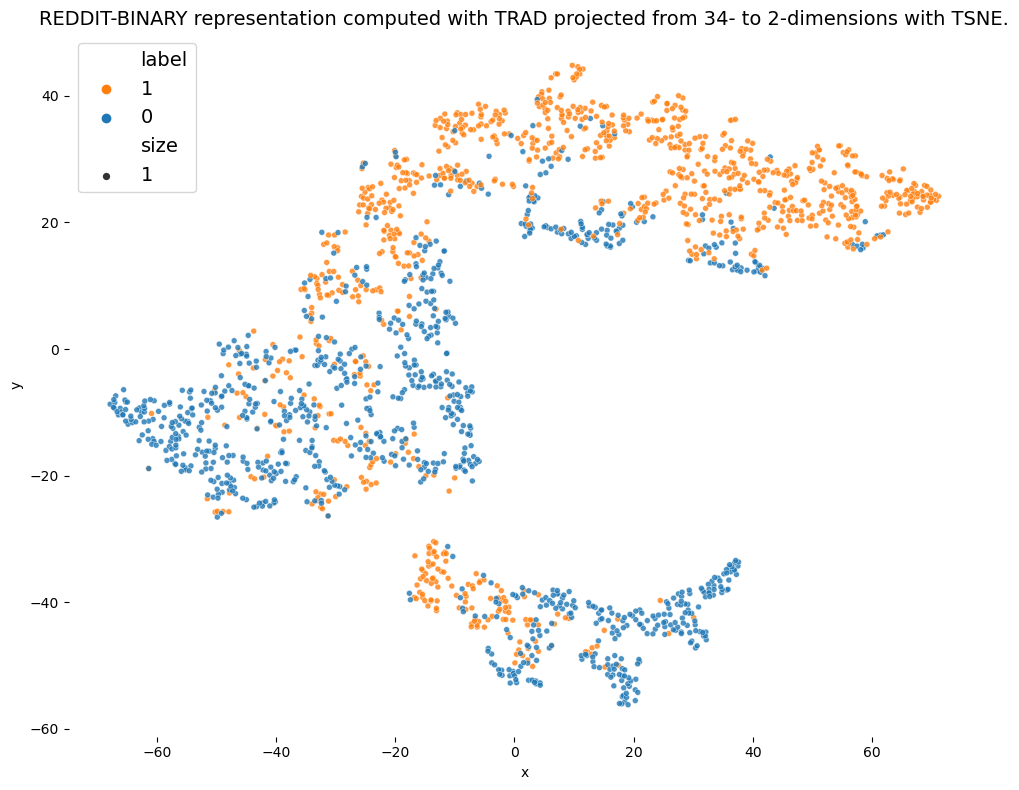

In [2]:
TRAD_CONFIG_PATH = "saved/best_models/trad/"
#TRAD_CONFIG_PATH = "Configs/config_files/def_trad.json"

viz.main(
    model=TRAD_CONFIG_PATH,
    dataset="REDDIT-BINARY",
    model_name="TRAD",
    #pooler_args={},
    red_type="manifold.TSNE",#None
    #red_args={},
    no_interactive=True,
)

# 🌡 Best `trad_degs` ?

- Output dimension : 64, meaning `bins:64`
- Max degrees in `np.linspace(32, 1024, 16)`

In [291]:
from Models import from_pretrained
import json

In [303]:
OUTPUT_DIM = 64

min_tested_deg = 32
max_tested_deg = 1024
step_size = 16

test_degs = np.linspace(32, 1024, int((max_tested_deg-min_tested_deg)/step_size)+1)

In [304]:
DATASET_CLASSIFICATION = "../data/data_gnns/graphs_catalogue.csv"
#PATH_TO_MODEL_TRADDEGS = "./saved/best_models/trad_degs/"

PATH_TO_TRADDEGS_CONFIG = "./Configs/config_files/def_trad.json"

In [305]:
accuracies = []
stds = []

for md in test_degs:
    # open json and change parameters
    with open(PATH_TO_TRADDEGS_CONFIG) as json_config:
        config_trad = json.load(json_config)
    json_config.close()
    
    config_trad["arch"]["args"]["stats_dict"]["deg"]["bins"] = OUTPUT_DIM
    config_trad["arch"]["args"]["stats_dict"]["deg"]["range"] = [0, test_degs[0]]
    
    with open(PATH_TO_TRADDEGS_CONFIG, "w") as json_config:
        json.dump(config_trad, json_config)
    json_config.close()
    
    # run experiment
    test_classification_md = tasks.testmodel_dataset(
        model=PATH_TO_TRADDEGS_CONFIG,
        dataset=DATASET_CLASSIFICATION#"REDDIT-BINARY"
    )
    
    # store scores
    accuracies += [test_classification_md.scores["Micro-F1"]]
    stds += [test_classification_md.scores['Micro-F1 (std.)']]

TradModel(
	 — deg      ( bins : 64   | range: [0, 32.0])
)
┌-----------------------------------------------------------┐
|                       REDDIT-BINARY                       |
├-----------------------------------------------------------┤
|number of graphs                       |               2000|
|nodes — tot                            |             859254|
|nodes — mean                           |            429.627|
|nodes — median                         |              304.5|
|nodes — min                            |                  6|
|nodes — max                            |               3782|
|edges — tot                            |            1991016|
|edges — mean                           |            995.508|
|edges — median                         |              758.0|
|edges — min                            |                  8|
|edges — max                            |               8142|
|number of labels                       |                  2|
|   - 0 (0

KeyError: 'F1-micro'

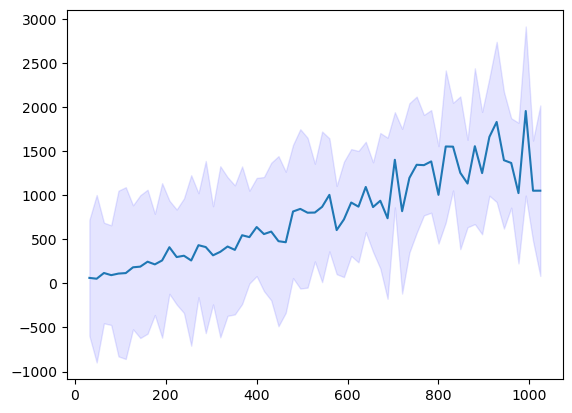

In [332]:
from matplotlib import pyplot as plt
import numpy as np

#some example data
accuracies = (1+np.random.random(len(test_degs))) * test_degs
#some confidence interval
stds = np.std(accuracies)*(1+np.random.random(len(test_degs)))

fig, ax = plt.subplots()
ax.plot(test_degs, accuracies)
ax.fill_between(test_degs
                , (accuracies-stds), (accuracies+stds)
                , color='b'
                , alpha=.1
               )

In [327]:
np.random.random(10)

array([0.58748397, 0.62351785, 0.04603719, 0.1710558 , 0.07068533,
       0.36954537, 0.39584655, 0.22179306, 0.81304505, 0.47558228])

In [323]:
stds

215.53720297588222

In [274]:
model_tested.stats_dict

OrderedDict([('deg', OrderedDict([('bins', 64), ('range', [0, 1])]))])

In [ ]:
test_classification = tasks.testmodel_dataset(
    model=model_tested,#PATH_TO_MODEL,#PATH_TO_MODEL_GCC,
    dataset="REDDIT-BINARY"
)

# 🔍 Investigating GCC model

In [649]:
import graph_tool.all as gt
from graph_tool.spectral import adjacency

from tqdm import tqdm
import matplotlib.pyplot as plt

In [650]:
import Models.from_pretrained as pretrained

In [651]:
PATH_TO_MODEL_GCCvGCN = "./saved/models/GCC_default/0206_183410/"

In [652]:
loaded_gcc = pretrained.get_model(PATH_TO_MODEL_GCCvGCN)

In [653]:
for w in loaded_gcc.encoder.layers:
    print(w.weight.sum())

tensor(20.3387, grad_fn=<SumBackward0>)
tensor(-23.0461, grad_fn=<SumBackward0>)


In [654]:
loaded_gcc.encoder.input_dimension-(loaded_gcc.degree_embedding.embedding_dim+1)

128

In [655]:
gt_test = 'moviegalaxies/330'
gt_test_g = gt.collection.ns[gt_test]

test_g = dgl.from_scipy(adjacency(gt_test_g))

In [656]:
loaded_gcc.embed(test_g)

array([-0.07930867,  0.17380218, -0.19017538, -0.1859831 ,  0.03287242,
        0.00462318,  0.06422826,  0.07686871,  0.11841117,  0.11228189,
       -0.14853103,  0.01775945, -0.17666927,  0.13847944, -0.07790376,
       -0.18721515,  0.12359653, -0.03642394,  0.23778413, -0.21939148,
        0.10933483,  0.16496131,  0.15176742, -0.05827006,  0.04647955,
       -0.01728409, -0.20600605, -0.05074505, -0.03194427,  0.14044642,
       -0.14095527,  0.14638433,  0.03800814, -0.06671872,  0.1144859 ,
        0.08534978,  0.03965482,  0.10708711, -0.15079467, -0.03329978,
        0.12446727, -0.10453956, -0.11527988,  0.16049708,  0.13128512,
        0.04938447,  0.1759923 , -0.10675701,  0.16372433,  0.11692525,
       -0.06125623, -0.03184199, -0.16740012,  0.03753655, -0.09205712,
        0.03584008, -0.15672554,  0.12111545, -0.06773324,  0.1458204 ,
        0.1943107 ,  0.15196994,  0.11601447,  0.17376103], dtype=float32)

In [657]:
rdt_bin = pretrained.get_dataset("REDDIT-BINARY")

In [658]:
for i in tqdm(range(len(rdt_bin))):
    try:
        loaded_gcc.embed(rdt_bin[i])
    except:
        print(i)

 26%|██████████▍                             | 522/2000 [00:44<12:06,  2.03it/s]

521


 55%|█████████████████████▍                 | 1098/2000 [02:32<05:21,  2.80it/s]

1097


100%|███████████████████████████████████████| 2000/2000 [03:12<00:00, 10.40it/s]


In [659]:
for i in tqdm(range(len(rdt_bin))):
    if max(rdt_bin[i].in_degrees()) > rdt_bin[i].num_nodes():
        print(i)

100%|█████████████████████████████████████| 2000/2000 [00:01<00:00, 1303.29it/s]


In [660]:
rdt_bin[1110], rdt_bin[602]

(Graph(num_nodes=885, num_edges=2318,
       ndata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), 'pos_undirected': Scheme(shape=(128,), dtype=torch.float32), 'seed': Scheme(shape=(), dtype=torch.int64)}
       edata_schemes={'count': Scheme(shape=(), dtype=torch.int64)}),
 Graph(num_nodes=2588, num_edges=5628,
       ndata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), 'pos_undirected': Scheme(shape=(128,), dtype=torch.float32), 'seed': Scheme(shape=(), dtype=torch.int64)}
       edata_schemes={'count': Scheme(shape=(), dtype=torch.int64)}))

In [661]:
test_rdt_id = 0

max(rdt_bin[test_rdt_id].in_degrees()), rdt_bin[test_rdt_id].num_nodes(), rdt_bin[test_rdt_id].num_edges()

(tensor(128), 218, 480)

In [662]:
srcs_trgs = []

for s, t in zip(rdt_bin[test_rdt_id].edges()[0],rdt_bin[test_rdt_id].edges()[1]):
    srcs_trgs += [(int(s),int(t))]

In [663]:
doubled = 0
for st in srcs_trgs:
    if (st[1], st[0]) in srcs_trgs:
        doubled += 1

In [664]:
doubled/2 # --> all edges are doubled ....

240.0

In [666]:
rdt_bin[test_rdt_id].edges('eid')

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 1

# 👯‍♂️ double edges on loading datasets

In [598]:
import pandas as pd

In [611]:
pd.read_csv("../data/data_gnns/graphs_catalogue.csv")[:12]

,Name,Nodes,Edges,$\left<k\right>$,$\sigma_k$,$\lambda_h$,$\tau$,$r$,$c$,$\oslash$,$S$,Kind,Mode,NPs,EPs,Tags,Category,bytes_size
0,7th_graders,29,740,25.52,20.34,17.73,1.71,-0.01,0.76,2,1.00,Directed,Unipartite,name,weight layer,Social Offline Multilayer Unweighted Metadata,Social,1024.0
1,adjnoun,112,425,7.59,6.85,11.54,2.27,-0.13,0.16,5,1.00,Undirected,Unipartite,label value,NaN,Informational Language Unweighted,Informational,3072.0
2,advogato,6541,51127,7.82,34.13,68.61,20.71,-0.05,0.11,9,0.77,Directed,Unipartite,meta,weight,Social Online Weighted,Social,246784.0
3,anybeat,12645,67053,5.30,89.97,92.23,41.02,-0.12,0.02,10,1.00,Directed,Unipartite,name,NaN,Social Online Unweighted,Social,329728.0
4,arxiv_authors/GrQc,26197,28980,2.21,8.35,44.44,535.05,0.66,0.61,17,0.16,Undirected,Unipartite,NaN,NaN,Social Collaboration Unweighted Projection,Social,449536.0
5,arxiv_authors/HepTh,68746,51971,1.51,5.97,30.01,319.87,0.27,0.27,18,0.13,Undirected,Unipartite,NaN,NaN,Social Collaboration Unweighted Projection,Social,1153433.6
6,arxiv_collab/cond-mat-1999,16726,47594,5.69,6.42,23.14,138.86,0.18,0.36,18,0.83,Undirected,Unipartite,label,value,Social Collaboration Weighted Projection,Social,466944.0
7,arxiv_collab/hep-th-1999,8361,15751,3.77,4.31,22.00,178.64,0.29,0.33,19,0.70,Undirected,Unipartite,label,value,Social Collaboration Weighted Projection,Social,230400.0
8,baseball/player-player,72,1089,30.25,18.59,44.00,2.56,0.99,1.00,2,0.62,Undirected,Unipartite,name,NaN,Social Offline Weighted Projection,Social,2048.0
9,baseball/user-provider,84,84,2.00,4.78,1.73,6.60,-0.45,0.00,4,0.56,Undirected,Bipartite,name,NaN,Social Offline Weighted Projection,Social,2048.0


In [635]:
netz_data_test = pretrained.get_dataset("../data/data_gnns/graphs_catalogue.csv 12")

🦦 converting 12 graphs from graph-tool library to DGL format.


100%|█████████████████████████████| 12/12 [00:00<00:00, 708.88it/s, graph=bison]

Whole dataset of 12 graphs loaded successfully.


In [636]:
for i in tqdm(range(len(netz_data_test))):
    if max(netz_data_test[i].in_degrees()) > netz_data_test[i].num_nodes():
        print("Graph ID: {} | Node ID: {} | Max Deg: {} | Nodes: {}".format(
            i
            , np.argmax(netz_data_test[i].in_degrees())
            , max(netz_data_test[i].in_degrees())
            , netz_data_test[i].num_nodes()
        )
             )

100%|███████████████████████████████████████████| 12/12 [00:00<00:00, 29.72it/s]


In [637]:
netz_data_test[0].out_degrees()#(10)

tensor([15, 20,  8, 11, 19, 23,  7, 28, 20,  9, 28, 15, 18, 20, 20, 21, 16,  8,
        22, 18, 17, 19, 19, 20,  8, 18, 18, 18, 17])

In [638]:
netz_data_test[0].in_degrees()

tensor([15, 20,  8, 11, 19, 23,  7, 28, 20,  9, 28, 15, 18, 20, 20, 21, 16,  8,
        22, 18, 17, 19, 19, 20,  8, 18, 18, 18, 17])

In [639]:
for i in tqdm(range(len(netz_data_test))):
    if max(netz_data_test[i].out_degrees()) > netz_data_test[i].num_nodes():
        print(i, max(netz_data_test[i].out_degrees()), netz_data_test[i].num_nodes())

100%|███████████████████████████████████████████| 12/12 [00:00<00:00, 48.81it/s]


In [640]:
test_ind = -1

srcs_trgs = []

for s, t in zip(netz_data_test[test_ind].edges()[0],netz_data_test[test_ind].edges()[1]):
    srcs_trgs += [(int(s),int(t))]
    
doubled = 0
for st in srcs_trgs:
    if (st[1], st[0]) in srcs_trgs:
        doubled += 1
print(doubled, netz_data_test[test_ind].num_edges())

444 444


In [641]:
dgl.to_simple(netz_data_test[test_ind])

Graph(num_nodes=26, num_edges=444,
      ndata_schemes={}
      edata_schemes={'count': Scheme(shape=(), dtype=torch.int64)})

In [642]:
netz_data_test[test_ind]

Graph(num_nodes=26, num_edges=444,
      ndata_schemes={}
      edata_schemes={'count': Scheme(shape=(), dtype=torch.int64)})

In [643]:
for i, g in enumerate(netz_data_test.graphs):
    n_nodes = g.num_nodes()
    n_edges = g.num_edges()
    
    max_possible_edges = lambda n: int(n*(n-1)/2)
    
    if max_possible_edges(n_nodes) < n_edges:
        print(i)
        print(max_possible_edges(n_nodes), n_edges, int(n_edges/2))

0
406 500 250
11
325 444 222


In [644]:
g.edges('eid')

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 1

In [648]:
test_ind = -1
g = netz_data_test[test_ind]


edges_id = g.edges('eid')
srcs = g.edges()[0]
targs = g.edges()[1]

st = [(s, t) for s, t in zip(srcs, targs)]

for eid in edges_id:
    other_sts = st[:eid]+st[eid+1:]
    if st[eid] in other_sts:
        print(eid)

In [592]:
test_list = [0, 1, 2, 3, 4, 5, 6, 7]
test_list[:1]+test_list[1+1:]

[0, 2, 3, 4, 5, 6, 7]

# 🌐 Loading some graphs 🐛

In [5]:
import graph_tool.all as gt
import dgl
from graph_tool.spectral import adjacency

In [7]:
killer_n = 'internet_top_pop/AttMpls'
killer_g = gt.collection.ns[killer_n]

OSError: Error reading graph: invalid property type 3

In [16]:
killer_g_dgl = dgl.from_scipy(adjacency(killer_g))

In [17]:
killer_g_dgl

Graph(num_nodes=22963, num_edges=96872,
      ndata_schemes={}
      edata_schemes={})

# ➗ Experimenting with statistics computation

## RW distance

In [320]:
from tqdm import tqdm
import networkx as nx

In [407]:
import dgl
import dgl.function as fn
import igraph as ig

_LARGE_VALUE = 11

_N_REPEATS = 100

er_graph = ig.Graph.Erdos_Renyi(n=100, m=500, directed=False, loops=False)
er_graph = dgl.from_networkx(er_graph.to_networkx())

net = er_graph

In [416]:
%%time 

# Generate RWs
rws = []
for rdm_v in tqdm(vertices):
    for _ in range(_N_REPEATS):
        #rdm_v = np.random.choice(vertices)
        traj, _ = dgl.sampling.random_walk(net, rdm_v, length=_LARGE_VALUE)
        rws += [traj]
    
# get pairs
dmatrix = np.full((len(vertices), len(vertices)), _LARGE_VALUE)
degs = net.in_degrees()

for i, v_orig in enumerate(vertices):
    dmatrix[v_orig, v_orig] = 0
    if degs[i] < 1:
        pass
    else:
        for j, v_targ in enumerate(vertices[:v_orig]):
            best_l = _LARGE_VALUE

            lengths = [
                np.abs(int(np.argmax(rw==v_orig))-int(np.argmax(rw==v_targ)))
                for rw in rws
                if ((v_orig in rw) and (v_targ in rw))
            ]

            if len(lengths)>0:
                if np.min(lengths) < _LARGE_VALUE:
                    dmatrix[v_orig][v_targ] = dmatrix[v_targ][v_orig] = np.min(lengths)

100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 83.09it/s]


CPU times: user 2min 24s, sys: 671 ms, total: 2min 24s
Wall time: 2min 26s


In [418]:
dmatrix

array([[0, 2, 2, ..., 2, 2, 3],
       [2, 0, 2, ..., 2, 2, 2],
       [2, 2, 0, ..., 2, 2, 3],
       ...,
       [2, 2, 2, ..., 0, 2, 3],
       [2, 2, 2, ..., 2, 0, 3],
       [3, 2, 3, ..., 3, 3, 0]])

In [419]:
dmatrix_flattened = [
    item 
    for sublist in dmatrix
  for item in sublist 
  if item > 0
]

In [420]:
len(dmatrix_flattened)

9900

In [421]:
%%time 
dmatrix_hacky = np.array([item 
          for sublist in ig.Graph.from_networkx(nx.to_undirected(dgl.to_networkx(net))).distances(mode=ig.ALL) 
          for item in sublist 
          if item > 0
         ]
        )

CPU times: user 6.39 ms, sys: 7.01 ms, total: 13.4 ms
Wall time: 41.3 ms


In [422]:
len(dmatrix_hacky)

9900

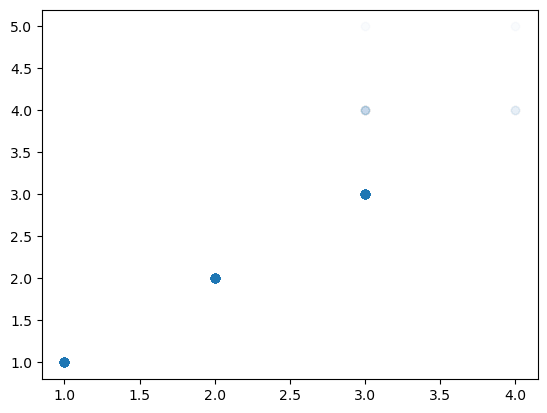

In [435]:
plt.scatter(dmatrix_hacky, np.array(dmatrix_flattened), alpha=0.01)

In [299]:
n_max = 100
n_repeats = 10

traj, _ = dgl.sampling.random_walk(er_graph, 0, length=1)

traj

tensor([[ 0, 15]])

In [308]:
int(np.argmax(traj==15))

1

In [275]:
er_graph.nodes()

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [19]:
import igraph as ig
import networkx as nx

In [77]:
import math

In [54]:
nx_g = nx.to_undirected(dgl.to_networkx(test_g))
ig_g = ig.Graph.from_networkx(nx_g)

ig.Graph.from_networkx(nx.to_undirected(dgl.to_networkx(g)))

In [55]:
sp = ig_graph.distances(mode=ig.ALL)

values = [item for sublist in sp for item in sublist if item > 0]

In [56]:
sp

[[0, inf, inf, inf, inf],
 [inf, 0, 1, 2, 3],
 [inf, 1, 0, 1, 2],
 [inf, 2, 1, 0, 1],
 [inf, 3, 2, 1, 0]]

In [57]:
len(sp)*len(sp[0])

25

In [58]:
values

[inf, inf, inf, inf, inf, 1, 2, 3, inf, 1, 1, 2, inf, 2, 1, 1, inf, 3, 2, 1]

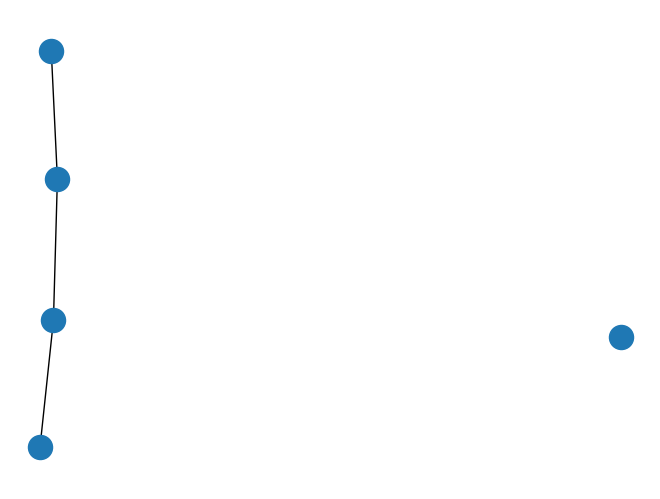

In [59]:
nx.draw(nx_g)

In [67]:
ig_g.pagerank()

[0.03614457831325302,
 0.16909744240118368,
 0.3128302684421898,
 0.31283026844218975,
 0.16909744240118366]

In [84]:
motifs = ig_g.motifs_randesu(size=3, cut_prob=None)
motifs = np.array(motifs)
motifs

array([nan, nan,  2.,  0.])

In [85]:
np.isnan(motifs)

array([ True,  True, False, False])

In [86]:
motifs[np.isnan(motifs)] = 0

motifs

array([0., 0., 2., 0.])

In [79]:
counts = []
for count in motifs:
    if math.isnan(count):
        counts.append(0)
    else:
        counts.append(count)
        
counts

[0, 0, 2, 0]